### Recommendation System for E-commerce

In [8]:
!kaggle datasets download -d PromptCloudHQ/flipkart-products

Dataset URL: https://www.kaggle.com/datasets/PromptCloudHQ/flipkart-products
License(s): CC-BY-SA-4.0
100%|███████████████████████████████████████| 5.50M/5.50M [00:11<00:00, 679kB/s]
100%|███████████████████████████████████████| 5.50M/5.50M [00:11<00:00, 501kB/s]


In [9]:
! mkdir flipkart-products

In [10]:
! unzip flipkart-products.zip -d flipkart-products

Archive:  flipkart-products.zip
  inflating: flipkart-products/flipkart_com-ecommerce_sample.csv  


In [26]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("/home/rewood/Desktop/Untitled Folder/flipkart-products/flipkart_com-ecommerce_sample.csv")

In [14]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  20000 non-null  object 
 1   crawl_timestamp          20000 non-null  object 
 2   product_url              20000 non-null  object 
 3   product_name             20000 non-null  object 
 4   product_category_tree    20000 non-null  object 
 5   pid                      20000 non-null  object 
 6   retail_price             19922 non-null  float64
 7   discounted_price         19922 non-null  float64
 8   image                    19997 non-null  object 
 9   is_FK_Advantage_product  20000 non-null  bool   
 10  description              19998 non-null  object 
 11  product_rating           20000 non-null  object 
 12  overall_rating           20000 non-null  object 
 13  brand                    14136 non-null  object 
 14  product_specifications

In [16]:
df.describe()

,retail_price,discounted_price
count,19922.000000,19922.000000
mean,2979.206104,1973.401767
std,9009.639341,7333.586040
min,35.000000,35.000000
25%,666.000000,350.000000
50%,1040.000000,550.000000
75%,1999.000000,999.000000
max,571230.000000,571230.000000


## Detect missing values

In [19]:
df.isnull().sum()

uniq_id                       0
crawl_timestamp               0
product_url                   0
product_name                  0
product_category_tree         0
pid                           0
retail_price                 78
discounted_price             78
image                         3
is_FK_Advantage_product       0
description                   2
product_rating                0
overall_rating                0
brand                      5864
product_specifications       14
dtype: int64

In [28]:
df.isnull().mean() * 100

uniq_id                     0.000
crawl_timestamp             0.000
product_url                 0.000
product_name                0.000
product_category_tree       0.000
pid                         0.000
retail_price                0.390
discounted_price            0.390
image                       0.015
is_FK_Advantage_product     0.000
description                 0.010
product_rating              0.000
overall_rating              0.000
brand                      29.320
product_specifications      0.070
dtype: float64

We have about 30% missing values because of col brand, fill it with "Noname" brand. Drop other rows with missing values

In [22]:
df['brand'].fillna('NoName', inplace=True)
df.dropna(inplace=True)

In [7]:
df.isnull().mean() * 100

uniq_id                    0.0
crawl_timestamp            0.0
product_url                0.0
product_name               0.0
product_category_tree      0.0
pid                        0.0
retail_price               0.0
discounted_price           0.0
image                      0.0
is_FK_Advantage_product    0.0
description                0.0
product_rating             0.0
overall_rating             0.0
brand                      0.0
product_specifications     0.0
dtype: float64

In [23]:
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce') # Preprocess overall_rating (convert to numeric)
df['description'] = df['description'].fillna('') # Fill missing descriptions with empty strings

## Handle Duplicates

In [8]:
df.duplicated().sum()

0

We dont have duplicated, but for test remove it.

In [9]:
df.drop_duplicates(inplace=True)

## Handle Inconsistent Data

In [11]:
for i in list(df.columns):
    if df.dtypes[i] == pd.StringDtype:
        df[i] = df[i].str.lower() # Convert column to consistent lowercase
        df[i] = df[i].str.strip() # Remove leading/trailing spaces

In [12]:
df.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2ff9kedefgf,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,key features of alisha solid women's cycling s...,no rating available,no rating available,alisha,"{""product_specification""=>[{""key""=>""number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,fabhomedecor fabric double sofa bed,"[""furniture >> living room furniture >> sofa b...",sbeeh3qgu7mfyjfy,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,fabhomedecor fabric double sofa bed (finish co...,no rating available,no rating available,fabhomedecor,"{""product_specification""=>[{""key""=>""installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,aw bellies,"[""footwear >> women's footwear >> ballerinas >...",shoeh4grsubjgzxe,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,key features of aw bellies sandals wedges heel...,no rating available,no rating available,aw,"{""product_specification""=>[{""key""=>""ideal for""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,alisha solid women's cycling shorts,"[""clothing >> women's clothing >> lingerie, sl...",srteh2f6huzmq6sj,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,key features of alisha solid women's cycling s...,no rating available,no rating available,alisha,"{""product_specification""=>[{""key""=>""number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,sicons all purpose arnica dog shampoo,"[""pet supplies >> grooming >> skin & coat care...",psoeh3zydmsyarj5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,specifications of sicons all purpose arnica do...,no rating available,no rating available,sicons,"{""product_specification""=>[{""key""=>""pet type"",..."


## Visualisation

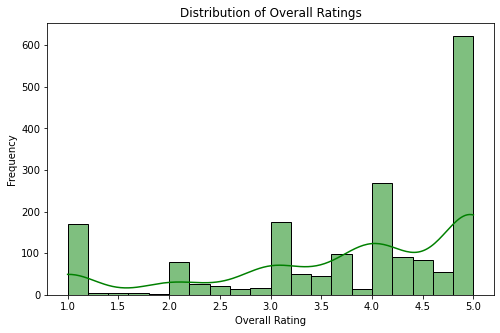

In [16]:
# Convert overall_rating to numeric, if not already
df['overall_rating'] = pd.to_numeric(df['overall_rating'], errors='coerce')

# Plot distribution of Overall Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['overall_rating'], bins=20, kde=True, color='green')
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.show()


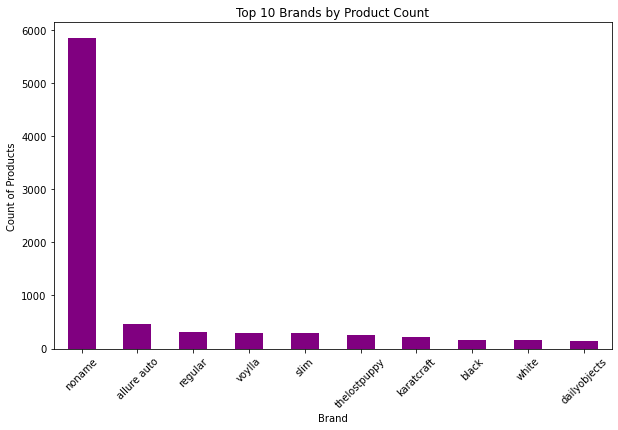

In [19]:
# Plot most common brands
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10).plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

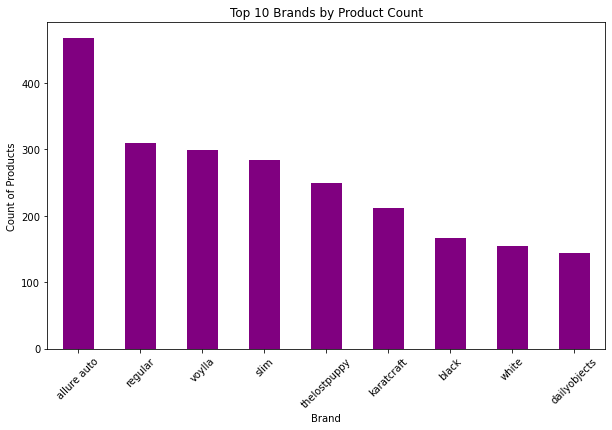

In [20]:
# Plot most common brands without noname
plt.figure(figsize=(10, 6))

df['brand'].value_counts().nlargest(10)[1:].plot(kind='bar', color='purple')

plt.title('Top 10 Brands by Product Count')
plt.xlabel('Brand')
plt.ylabel('Count of Products')
plt.xticks(rotation=45)

plt.show()

## User-Based Collaborative Filtering (KNN)

In [24]:
# Create user-item interaction matrix (simulated with 'pid' and 'overall_rating')
user_item_matrix = df.pivot_table(index='uniq_id', columns='pid', values='overall_rating')

# Fill missing values with 0 (no interaction)
user_item_matrix = user_item_matrix.fillna(0)

In [48]:
# Create a KNN model for user-based collaborative filtering
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(user_item_matrix)

# Choose a random user to get recommendations
user_index = np.random.choice(user_item_matrix.index)

# Find similar users to the chosen user
distances, indices = knn.kneighbors([user_item_matrix.loc[user_index]], n_neighbors=5)

# Print similar users
similar_users = user_item_matrix.index[indices.flatten()]
print("Similar Users to User {}: {}".format(user_index, similar_users))

Similar Users to User fa6d8b59e6471167971fa7ebc78e3594: Index(['fa6d8b59e6471167971fa7ebc78e3594', 'adff8f8d976cfed97f8a6408f651e74a',
       'ae19a81b730b48b87ca72521af8fb902', 'ae03731c3482a5e42d040dbf723c49af',
       'ae3fad1fc6656b1dee010f9a0cc1817d'],
      dtype='object', name='uniq_id')


/home/rewood/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


## Item-Based Collaborative Filtering (Cosine Similarity)

In [28]:
# Transpose the user-item matrix to have items as rows
item_user_matrix = user_item_matrix.T

# Compute cosine similarity between items
item_similarity = cosine_similarity(item_user_matrix)

# Convert to a DataFrame for better visualization
item_similarity_df = pd.DataFrame(item_similarity, index=item_user_matrix.index, columns=item_user_matrix.index)


In [29]:
# Choose a random product (or a specific one)
chosen_product = np.random.choice(item_user_matrix.index)

# Get the most similar products
similar_products = item_similarity_df[chosen_product].sort_values(ascending=False).head(5)

print("Products similar to {}: \n{}".format(chosen_product, similar_products))


Products similar to watdtwrzksxqcxdp: 
pid
watdtwrzksxqcxdp    1.0
acbea4494gnxg3tz    0.0
shte6gkktz3mfzth    0.0
shte6yvvzauucukp    0.0
shte6y46vsvgnz4k    0.0
Name: watdtwrzksxqcxdp, dtype: float64


## Content-Based Filtering (Using Descriptions)

In [30]:
# Vectorize product descriptions using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['description'])

# Compute cosine similarity between products based on their descriptions
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Convert to DataFrame for better handling
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['pid'], columns=df['pid'])


In [31]:
# Choose a random product
chosen_product_description = np.random.choice(df['pid'])

# Get the most similar products based on description
similar_products_description = cosine_sim_df[chosen_product_description].sort_values(ascending=False).head(5)

print("Products similar to {} based on description: \n{}".format(chosen_product_description, similar_products_description))


Products similar to brae6jczavvbxefg based on description: 
pid
brae6jczavvbxefg    1.000000
watdvjnatrbf2c3w    0.254630
braegjfxuhyzpdwz    0.216208
erge865hyzyg3ztx    0.212292
braegjfxw54gvefh    0.210372
Name: brae6jczavvbxefg, dtype: float64


## Visualization of Results

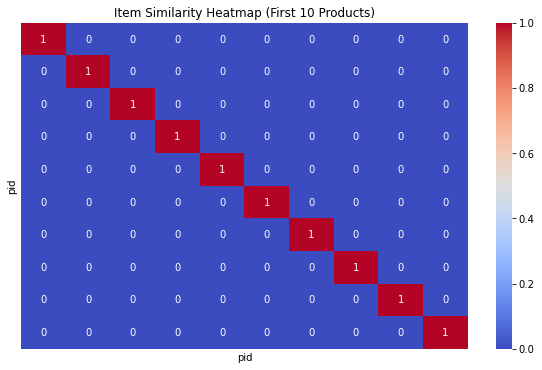

In [32]:
# Visualize similarity matrix for a few products
plt.figure(figsize=(10, 6))
sns.heatmap(item_similarity_df.iloc[:10, :10], annot=True, cmap='coolwarm', xticklabels=False, yticklabels=False)
plt.title('Item Similarity Heatmap (First 10 Products)')
plt.show()


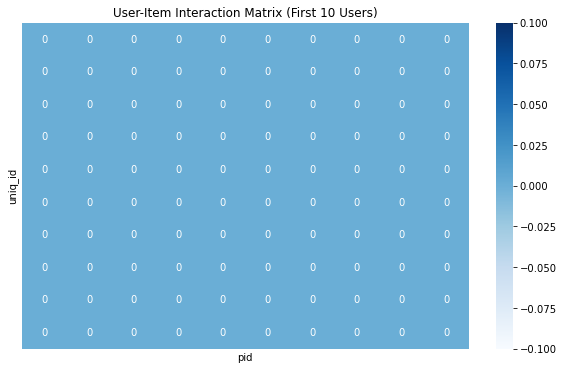

In [33]:
# Visualize the first 10 users and their interactions
plt.figure(figsize=(10, 6))
sns.heatmap(user_item_matrix.iloc[:10, :10], annot=True, cmap='Blues', xticklabels=False, yticklabels=False)
plt.title('User-Item Interaction Matrix (First 10 Users)')
plt.show()
